# <font color = black>KNearest Neighbors and the Iris Flower Data Set </font>

###  <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set" a> Wikipedia Entry </a>

#### References:
-  <a href = "https://www.edx.org/course/using-python-for-research" a>edX  Using Python for Research</a>
-  <a href = "https://www.dataschool.io/machine-learning-with-scikit-learn/" a> Dataschool/Kevin Markham Machine Learning with scikit learn</a>
-  <a href = "https://medium.com/codebagng/basic-analysis-of-the-iris-data-set-using-python-2995618a6342" a> "Basic Analysis of the Iris Data set Using Python" by Oluwasogo Oluwafemi Ogundowole </a>

      




In [199]:
import matplotlib
print(matplotlib.__version__)
print(matplotlib.get_backend())

2.1.2
module://ipykernel.pylab.backend_inline


## <font color = grey >1.    First things first.  Import our modules from Pandas and Matplotlib </font>

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score



## <font color = grey>2.  Import the dataset into a csv file. Create a dataframe and inpsect it.</font>

In [201]:
df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')

In [202]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [203]:
a = df.values
x = a[:,0:4]


In [204]:
df.head() 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [205]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
65,6.7,3.1,4.4,1.4,versicolor
87,6.3,2.3,4.4,1.3,versicolor
13,4.3,3.0,1.1,0.1,setosa
94,5.6,2.7,4.2,1.3,versicolor
99,5.7,2.8,4.1,1.3,versicolor
73,6.1,2.8,4.7,1.2,versicolor
124,6.7,3.3,5.7,2.1,virginica
122,7.7,2.8,6.7,2.0,virginica
79,5.7,2.6,3.5,1.0,versicolor
63,6.1,2.9,4.7,1.4,versicolor


In [206]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [207]:
df.groupby('species').describe().T

species                setosa  versicolor  virginica
petal_length count  50.000000   50.000000  50.000000
             mean    1.464000    4.260000   5.552000
             std     0.173511    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
petal_width  count  50.000000   50.000000  50.000000
             mean    0.244000    1.326000   2.026000
             std     0.107210    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000
sepal_length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
sepal_width  count  50.000000   50.000000  50.000000
             mean    3.418000    2.770000   2.974000
             std     0.381024    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.125000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000

### <font color = green> Lets plot the dataset using matplotlib.plt</font>

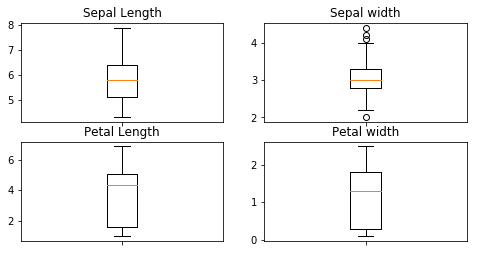

In [208]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=plt.figaspect(1/2))
axes[0, 0].boxplot(df['sepal_length'], data=a)
axes[0, 0].set(title="Sepal Length", xticklabels=[])
axes[0, 1].boxplot(df['sepal_width'])
axes[0, 1].set(title="Sepal width", xticklabels=[])
axes[1, 0].boxplot(df['petal_length'])
axes[1, 0].set(title="Petal Length", xticklabels=[])
axes[1, 1].boxplot(df['petal_width'])
axes[1, 1].set(title="Petal width", xticklabels=[])

plt.savefig('box.pdf')
plt.show()



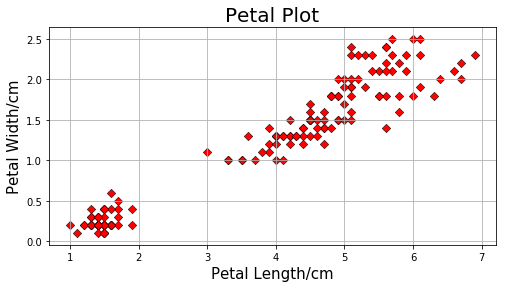

In [209]:
fig = plt.figure(figsize=plt.figaspect(1/2))
ax = fig.subplots()
x = df['petal_length']
y = df['petal_width']

ax.scatter(x, y, color='red', edgecolor='black', marker='D', linewidth=.5 )
ax.set_xlabel('Petal Length/cm', fontsize=15)
ax.set_ylabel('Petal Width/cm', fontsize=15)
ax.set_title("Petal Plot", fontsize=20)
plt.savefig('petal_plot.pdf')

ax.grid(True)
plt.show()



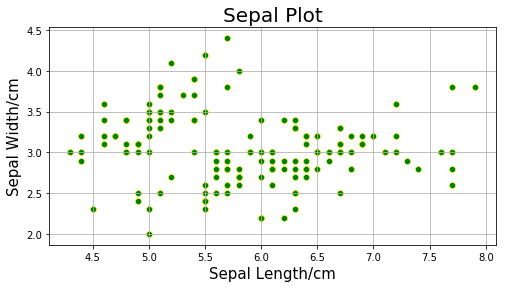

In [210]:
fig = plt.figure(figsize=plt.figaspect(1/2))
ax = fig.subplots()
x = df['sepal_length']
y = df['sepal_width']

ax.scatter(x, y, color='green', edgecolor='yellow', marker='o', linewidth=.5 )
ax.set_xlabel('Sepal Length/cm', fontsize=15)
ax.set_ylabel('Sepal Width/cm', fontsize=15)
ax.set_title("Sepal Plot", fontsize=20)
ax.grid(True)
plt.savefig('sepal_plot.pdf')

plt.show()

### <font color=green>Let's drop down to 10,000 feet and take a closer look.  Specifically, we will graph the dataset by species</font>

### <font color=green>Next we create three dataframes, one for each species.  We'll calculate the mean for each data series and then visualize the data with a scatter plot identified by species </font>

In [211]:
df_setosa = df[df.species == 'setosa']
setosa_mean_stats = df_setosa.mean()
print(f'Species Setosa mean statistics\n{setosa_mean_stats}')

Species Setosa mean statistics
sepal_length    5.006
sepal_width     3.418
petal_length    1.464
petal_width     0.244
dtype: float64


In [212]:
df_versicolor = df[df.species == 'versicolor']
versicolor_mean_stats = df_versicolor.mean()
print(f'Species Versicolor mean statistics\n{versicolor_mean_stats}')

Species Versicolor mean statistics
sepal_length    5.936
sepal_width     2.770
petal_length    4.260
petal_width     1.326
dtype: float64


In [213]:
df_virginica = df[df.species == 'virginica']
virginica_mean_stats = df_virginica.mean()
print(f'Species Virginica mean statistics\n{virginica_mean_stats}')


Species Virginica mean statistics
sepal_length    6.588
sepal_width     2.974
petal_length    5.552
petal_width     2.026
dtype: float64


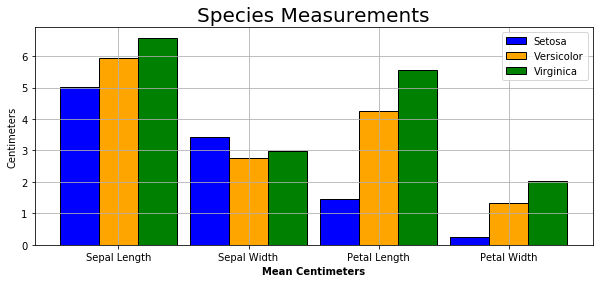

In [214]:
fig = plt.figure(figsize=plt.figaspect(1/2.5))
ax = fig.subplots()

sepal_length_bars = [setosa_mean_stats['sepal_length'], versicolor_mean_stats['sepal_length'], virginica_mean_stats['sepal_length']]
sepal_width_bars = [setosa_mean_stats['sepal_width'], versicolor_mean_stats['sepal_width'], virginica_mean_stats['sepal_width']]
petal_length_bars = [setosa_mean_stats['petal_length'], versicolor_mean_stats['petal_length'], virginica_mean_stats['petal_length']]
petal_width_bars = [setosa_mean_stats['petal_width'], versicolor_mean_stats['petal_width'], virginica_mean_stats['petal_width']]

barWidth = 0.30

 
# # Set position of bar on X axis
r1 = np.arange(len(setosa_mean_stats))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# # Make the plot
ax.bar(r1, setosa_mean_stats, color='blue', width=barWidth, edgecolor='black', label='Setosa')
ax.bar(r2, versicolor_mean_stats, color='orange', width=barWidth, edgecolor='black', label='Versicolor')
ax.bar(r3, virginica_mean_stats, color='green', width=barWidth, edgecolor='black', label='Virginica')
 
# # Add xticks on the middle of the group bars
plt.xlabel('Mean Centimeters', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(setosa_mean_stats))], ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
 
# # Create legend & Show graphic
ax.grid(True)
ax.set_title('Species Measurements', fontsize=20)
ax.set_ylabel('Centimeters')
ax.legend()
plt.savefig('species_bars.pdf')
plt.show()



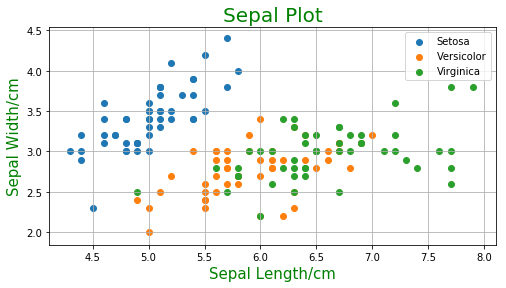

In [215]:
fig = plt.figure(figsize=plt.figaspect(1/2))
ax = fig.subplots()
ax.scatter(df_setosa.sepal_length, df_setosa.sepal_width, label="Setosa")
ax.scatter(df_versicolor.sepal_length, df_versicolor.sepal_width, label="Versicolor")
ax.scatter(df_virginica.sepal_length, df_virginica.sepal_width, label="Virginica")
ax.set_xlabel("Sepal Length/cm",fontsize=15, color='green')
ax.set_ylabel('Sepal Width/cm',fontsize=15, color='green' )
# ax.set_label('setosa')
ax.grid(True)
ax.set_title('Sepal Plot', fontsize=20, color='green')
ax.legend()
plt.show()







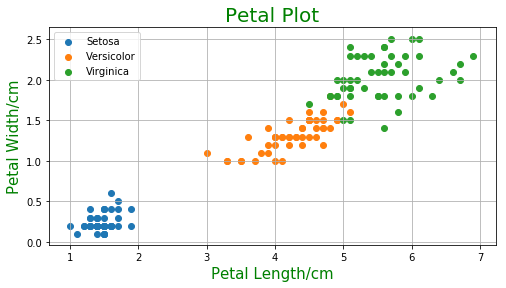

In [216]:
fig = plt.figure(figsize=plt.figaspect(1/2))
ax = fig.subplots()
ax.scatter(df_setosa.petal_length, df_setosa.petal_width, label="Setosa")
ax.scatter(df_versicolor.petal_length, df_versicolor.petal_width, label="Versicolor")
ax.scatter(df_virginica.petal_length, df_virginica.petal_width, label="Virginica")
ax.set_xlabel("Petal Length/cm",fontsize=15, color='green')
ax.set_ylabel('Petal Width/cm',fontsize=15, color='green' )
# ax.set_label('setosa')
ax.grid(True)
ax.set_title('Petal Plot', fontsize=20, color='green')
ax.legend()
plt.show()

### <font color=green> So far we can see patterns in our data.  This is especially true with petal measurements.   Each species bunches nicely into its own groupings with only slight overlap</font>

## <font color=grey> 4. Import the model_selection module from sklearn and start modeling the data.

In [217]:
from sklearn import model_selection

In [218]:

array = df.values
X = array[:,0:4]
y = array[:,4]
validation_size = 0.40
seed = 7
X_train, X_validation, y_train, y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [219]:
X_train.shape, y_train.shape, X_validation.shape, y_validation.shape

((90, 4), (90,), (60, 4), (60,))

### <font color = orange>K Nearest Neighbors or KNN<font>

#### <font color = purple>step one - Import the python class </font>

In [220]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#### <font color = purple> step two - create an instance of the class <font>

In [221]:
knn = KNeighborsClassifier()

#### <font color = purple>step three - fit the model</font>

In [222]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

#### <font color = purple>step four - predict the model</font>

#### <font color = green> Create a list of three samples with four data points, petal width and length and sepal width and length.  The output is the associated species.</font>

In [223]:
knn.predict([[5,3,1,0],[6,3,4,1],[7,3,5,2]])

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [224]:
knn.predict([[6,3,4,1]])

array(['versicolor'], dtype=object)

In [225]:
knn.predict([[7,3,5,2]])

array(['virginica'], dtype=object)

#### <font color = green> Let's measure and tune our model.  Although we used 60% (90 entries) of the data to fit our model we will measure the accuracy using 100% of our data. In other words we'll use both our training data and validation data to measure accuarcy.   <font>
    

In [226]:
y_pred = knn.predict(X)

In [227]:
print(len(y_pred), len(y))

150 150


In [228]:
print(metrics.accuracy_score(y_pred, y),type(metrics.accuracy_score(y_pred, y)))

0.96 <class 'numpy.float64'>


In [229]:
count = 0
for i in range(len(y)):
    if y[i] == y_pred[i]:
        count += 1.0
        
print(f'Number of correct predictions: {count} out of {len(y)}, The percentage correct: {count/len(y)* 100}%')  

Number of correct predictions: 144.0 out of 150, The percentage correct: 96.0%


#### <font color = green>Now lets use the 40% of the data held back as validation data to test our model<font>

In [230]:
y_pred = knn.predict(X_validation)
shape = y_pred.shape == y_validation.shape
print(f'Do the shapes of our vectors match? {shape}')
score = metrics.accuracy_score(y_pred, y_validation)
print(f'The current model accuracy score is {score}')
print(type(score))
# print(y_pred.shape)


Do the shapes of our vectors match? True
The current model accuracy score is 0.9333333333333333
<class 'numpy.float64'>


In [231]:
count = 0
for i in range(len(y_pred)):
    if y_validation[i] == y_pred[i]:
        count += 1.0
        
print(f'Number of correct predictions: {count} out of {len(y_pred)}; The percentage correct: {count/len(y_validation)* 100}%') 

Number of correct predictions: 56.0 out of 60; The percentage correct: 93.33333333333333%


#### <font color = green>Up to this point we've used n_neighbors = 5.  We've measured the distance between y and X and used the 5 closest neighbors.  Majority wins.   What is the optimal number of measurements to use?  Let's test using our validation data set.</font>


In [256]:
X_train.shape, y_train.shape

((90, 4), (90,))

In [257]:
neighbors = []
accuracy = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_validation)
    score = metrics.accuracy_score(y_pred, y_validation)
    neighbors.append(k)
    accuracy.append(score)
   
    
    

Text(0.5,0,'k neighbors')

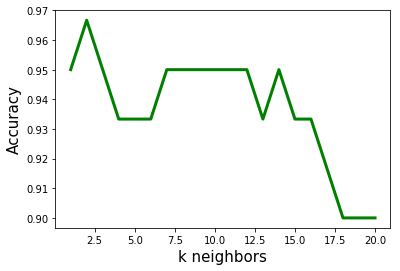

In [259]:
fig = plt.figure()
ax = fig.subplots()
ax.plot(neighbors, accuracy, color='green', linewidth=3)
ax.set_ylabel('Accuracy', fontsize=15)
ax.set_xlabel('k neighbors', fontsize=15)


In [236]:
for num, i in enumerate(accuracy):
    print(f'k = {num+1}, {i}')
    

k = 1, 0.95
k = 2, 0.9666666666666667
k = 3, 0.95
k = 4, 0.9333333333333333
k = 5, 0.9333333333333333
k = 6, 0.9333333333333333
k = 7, 0.95
k = 8, 0.95
k = 9, 0.95
k = 10, 0.95
k = 11, 0.95
k = 12, 0.95
k = 13, 0.9333333333333333
k = 14, 0.95
k = 15, 0.9333333333333333
k = 16, 0.9333333333333333
k = 17, 0.9166666666666666
k = 18, 0.9
k = 19, 0.9
k = 20, 0.9


#### <font color = green>Although n_neighbors = 2 produces the highest score it just feels like it's over fitting the model.  I like the steady results for 7, 8, 9, 10, 11, and 12.  Therefore we'll use 10 and rerun the model</font>


In [237]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_validation)
score = metrics.accuracy_score(y_pred, y_validation)
print(score)

0.95


#### <font color=purple>K-fold cross-validation in lieu of train, test model</font>

#### <font color=green>When we set up the data validation and prediction model we designated a random state of 7 which randomized the data for the test/train split.  The results change when we use a different random state.  For example when changing the  random state from 7 to 5 the model score increases from .95 to .98.  </font>

#### <font color= green>K-fold cross_validation creates "folds" which essentially rotates the randomized data used for the test train split and runs one model for each fold.

In [238]:
from sklearn.model_selection import cross_val_score

In [239]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv = 10, scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [240]:
print(scores.mean())

0.9666666666666668


In [241]:
neighbors = []
mean_score = []
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv = 10, scoring='accuracy').mean()
    neighbors.append(k)
    mean_score.append(scores)

In [242]:
score_dict =dict(zip(neighbors, mean_score))

In [243]:
print(max(mean_score))

0.9800000000000001


In [244]:
print(score_dict)

{1: 0.96, 2: 0.9533333333333334, 3: 0.9666666666666666, 4: 0.9666666666666666, 5: 0.9666666666666668, 6: 0.9666666666666668, 7: 0.9666666666666668, 8: 0.9666666666666668, 9: 0.9733333333333334, 10: 0.9666666666666668, 11: 0.9666666666666668, 12: 0.9733333333333334, 13: 0.9800000000000001, 14: 0.9733333333333334, 15: 0.9733333333333334, 16: 0.9733333333333334, 17: 0.9733333333333334, 18: 0.9800000000000001, 19: 0.9733333333333334, 20: 0.9800000000000001, 21: 0.9666666666666666, 22: 0.9666666666666666, 23: 0.9733333333333334, 24: 0.96, 25: 0.9666666666666666, 26: 0.96, 27: 0.9666666666666666, 28: 0.9533333333333334, 29: 0.9533333333333334}


Text(0.5,0,'k_neighbors')

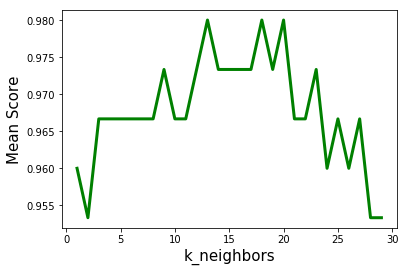

In [245]:
fig = plt.figure()
ax = fig.subplots()
ax.plot(neighbors, mean_score, color='green', linewidth=3)
ax.set_ylabel('Mean Score', fontsize=15)
ax.set_xlabel('k_neighbors', fontsize=15)

#### <font color=green>  Looks like we can generate a score of .98 using cross_val_score and k of either 13, 18, or 20.  Next lets take a look at GridSearchCV which streamlines the trail and error approach of maximizing multiple parameters </font>


In [247]:
from sklearn.model_selection import GridSearchCV

In [248]:
k_range = list(range(1, 30))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)



In [249]:
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=29, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [250]:
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]


,mean_test_score,std_test_score,params
0,0.960000,0.053333,{'n_neighbors': 1}
1,0.953333,0.052068,{'n_neighbors': 2}
2,0.966667,0.044721,{'n_neighbors': 3}
3,0.966667,0.044721,{'n_neighbors': 4}
4,0.966667,0.044721,{'n_neighbors': 5}
5,0.966667,0.044721,{'n_neighbors': 6}
6,0.966667,0.044721,{'n_neighbors': 7}
7,0.966667,0.044721,{'n_neighbors': 8}
8,0.973333,0.032660,{'n_neighbors': 9}
9,0.966667,0.044721,{'n_neighbors': 10}


In [251]:
s = grid.best_score_
p = grid.best_params_ 
e = grid.best_estimator_ 
i = grid.best_index_
print(f'Best Score: {s}\nBest n_neighbor: {p}\n')

Best Score: 0.98
Best n_neighbor: {'n_neighbors': 13}



## Based on n_neighbors = 13 and cv = 10 our model generates an accuracy score of .98.

### Is KNN the right model to use for this dataset?  Lets create a for loop and run five other potential tools to understand this information

In [252]:
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC


In [253]:
models = [LogisticRegression(), LinearDiscriminantAnalysis(), DecisionTreeClassifier(), GaussianNB(), SVC()]
names = ['LR', 'LDA', 'DTC', 'GNB', 'SVC']
model_mean_score = []
for i in range(len(models)):
    knn = models[i]
    scores = cross_val_score(knn, X, y, cv = 10, scoring='accuracy').mean()
    model_mean_score.append(scores)

In [254]:
model_dict = dict(zip(names, model_mean_score))
print(model_dict)

{'LR': 0.9533333333333334, 'LDA': 0.9800000000000001, 'DTC': 0.96, 'GNB': 0.9533333333333334, 'SVC': 0.9800000000000001}


### It certainly appears that other models may be just as useful as KNN for this dataset.  That's for another day and another jupyter notebook!